In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carregando os dados
df = pd.read_csv('versao_3_spotify_songs.csv')

### Redução de Dimensionalidade 

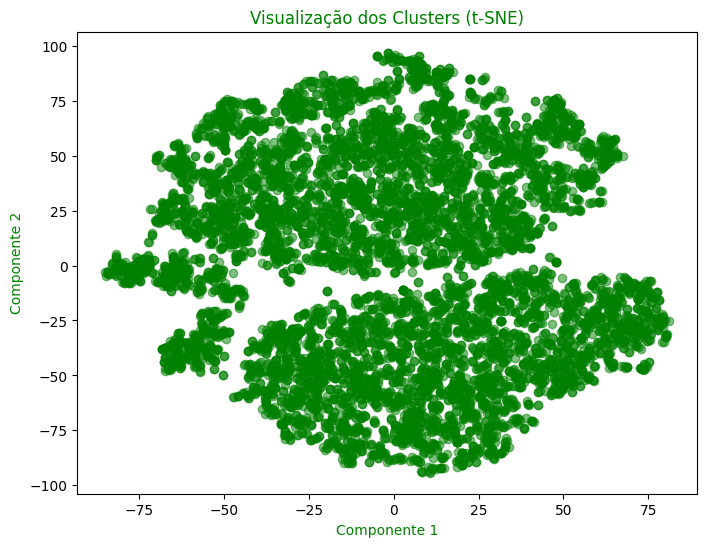

In [3]:
# Seleção de colunas numéricas
colunas_numericas = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]
dados_numericos = df[colunas_numericas]

# Redução de dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(dados_numericos)

# Visualização dos clusters com t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.5, c="green")
plt.title("Visualização dos Clusters (t-SNE)", color="green")
plt.xlabel("Componente 1", color="green")
plt.ylabel("Componente 2", color="green")
plt.show()

### Experimentação com Parâmetros do DBSCAN:

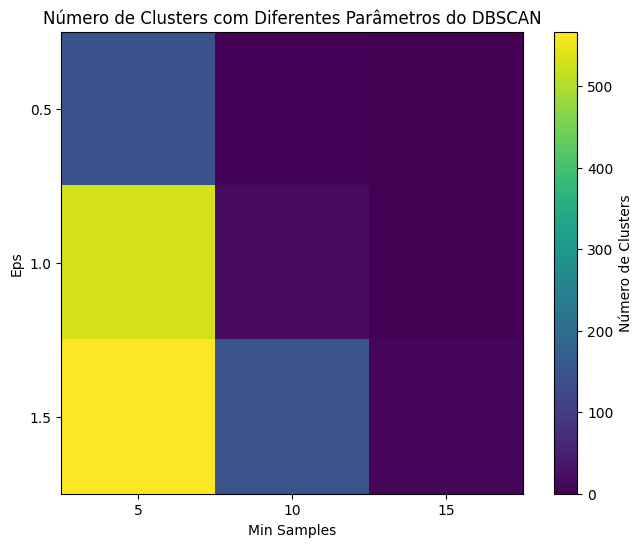

In [4]:
# Função para experimentar parâmetros do DBSCAN
def experimento(eps_values, min_samples_values, dados):
    resultados = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dados)
            n_clusters = len(np.unique(labels)) - 1  # Ignora o rótulo -1 (outliers)
            resultados[(eps, min_samples)] = n_clusters

    # Mapa de calor para os resultados
    n_clusters_array = np.zeros((len(eps_values), len(min_samples_values)))
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            n_clusters_array[i, j] = resultados[(eps, min_samples)]

    plt.figure(figsize=(8, 6))
    plt.imshow(n_clusters_array, cmap="viridis", interpolation="nearest")
    plt.colorbar(label="Número de Clusters")
    plt.xticks(np.arange(len(min_samples_values)), min_samples_values)
    plt.yticks(np.arange(len(eps_values)), eps_values)
    plt.xlabel("Min Samples")
    plt.ylabel("Eps")
    plt.title("Número de Clusters com Diferentes Parâmetros do DBSCAN")
    plt.show()

# Valores para experimentação do DBSCAN
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

# Chamada da função de experimentação
experimento(eps_values, min_samples_values, df_tsne)

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Ajuste o DBSCAN com diferentes valores de eps e min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_tsne)  # Use os dados transformados pelo t-SNE
        if len(np.unique(labels)) > 1:  # Verifique se mais de um cluster foi identificado
            silhouette_avg = silhouette_score(df_tsne, labels)
            print(f"For eps={eps}, min_samples={min_samples}, silhouette score: {silhouette_avg}")
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f"Best silhouette score: {best_silhouette_score} with eps={best_eps} and min_samples={best_min_samples}")


For eps=0.5, min_samples=5, silhouette score: -0.7218283414840698
For eps=0.5, min_samples=10, silhouette score: -0.5611693263053894
For eps=1.0, min_samples=5, silhouette score: -0.26255282759666443
For eps=1.0, min_samples=10, silhouette score: -0.7141450047492981
For eps=1.5, min_samples=5, silhouette score: 0.16923853754997253
For eps=1.5, min_samples=10, silhouette score: -0.5394435524940491
For eps=1.5, min_samples=15, silhouette score: -0.614709734916687
Best silhouette score: 0.16923853754997253 with eps=1.5 and min_samples=5


In [13]:
# Adicionar os rótulos ao DataFrame original
df['cluster'] = labels

# Calcular médias e desvios-padrão de cada atributo por cluster
descritivas_por_cluster = df.groupby('cluster').agg(['mean', 'std'])
print(descritivas_por_cluster)

        track_popularity           danceability              energy           \
                    mean       std         mean       std      mean      std   
cluster                                                                        
-1               0.03232  0.996804     0.031226  0.969167  0.054084  0.91241   

              key            loudness            ...  \
             mean       std      mean       std  ...   
cluster                                          ...   
-1      -0.004418  0.999765  0.106903  0.831761  ...   

        playlist_subgenre_reggaeton            \
                               mean       std   
cluster                                         
-1                         0.046477  0.210528   

        playlist_subgenre_southern hip hop          playlist_subgenre_trap  \
                                      mean      std                   mean   
cluster                                                                      
-1                     

/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_34150/3790585967.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/

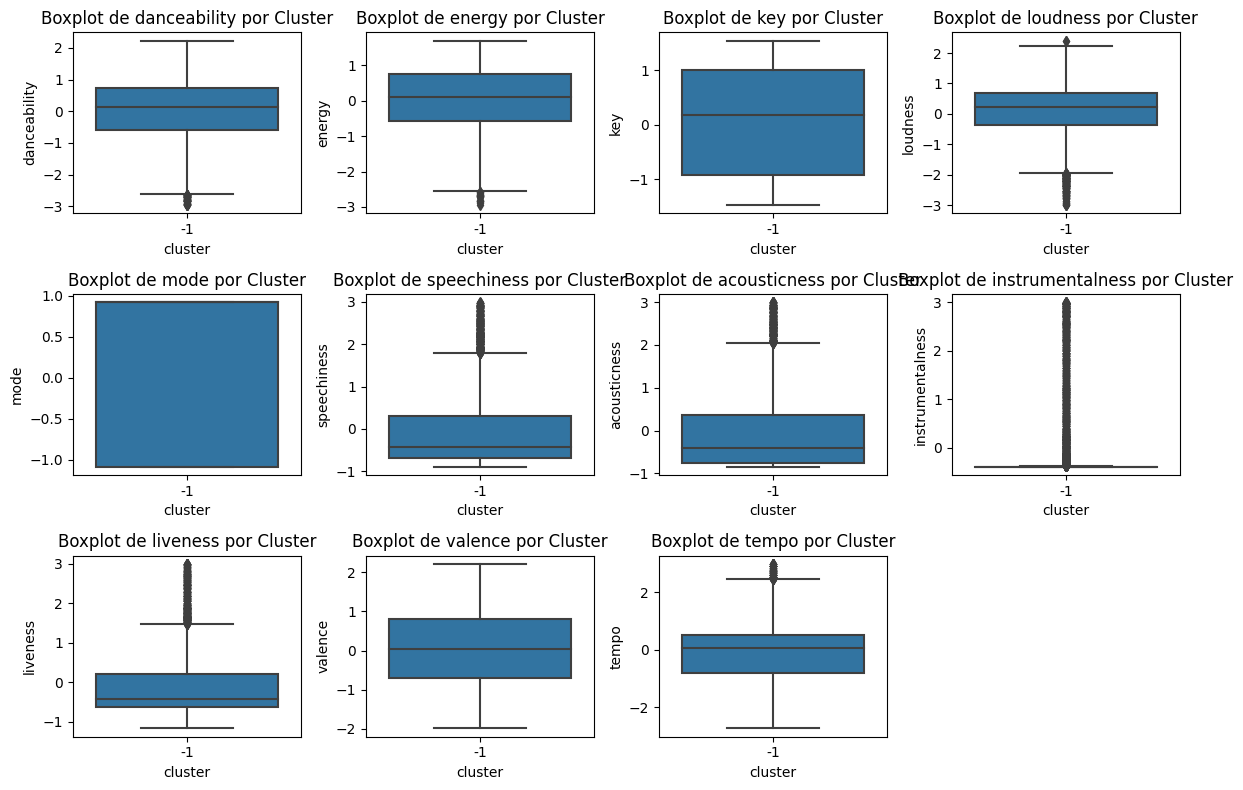

In [14]:
# Boxplot para cada atributo por cluster
plt.figure(figsize=(12, 8))
for i, col in enumerate(colunas_numericas):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'Boxplot de {col} por Cluster')
    plt.tight_layout()
plt.show()


In [18]:
# Adicionando um índice numérico às músicas
df['music_id'] = range(len(df))

# Criar um novo DataFrame com o índice numérico e os clusters
musicas_por_cluster = df[['music_id', 'cluster']]
print(musicas_por_cluster)
# Isso mostrará a associação de cada música (através do índice numérico) ao seu cluster correspondente


      music_id  cluster
0            0       -1
1            1       -1
2            2       -1
3            3       -1
4            4       -1
...        ...      ...
8752      8752       -1
8753      8753       -1
8754      8754       -1
8755      8755       -1
8756      8756       -1

[8757 rows x 2 columns]
